In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mne


In [2]:
given_data = np.loadtxt("C:\\Users\\User\\mneee/eeg-data.txt")

In [3]:
#Given
sampling_frequency=100
#Time can be found out by dividing the given data by the sampling frequency
time = np.arange(given_data.size)/sampling_frequency

Text(0.5, 1.0, 'EEG Data')

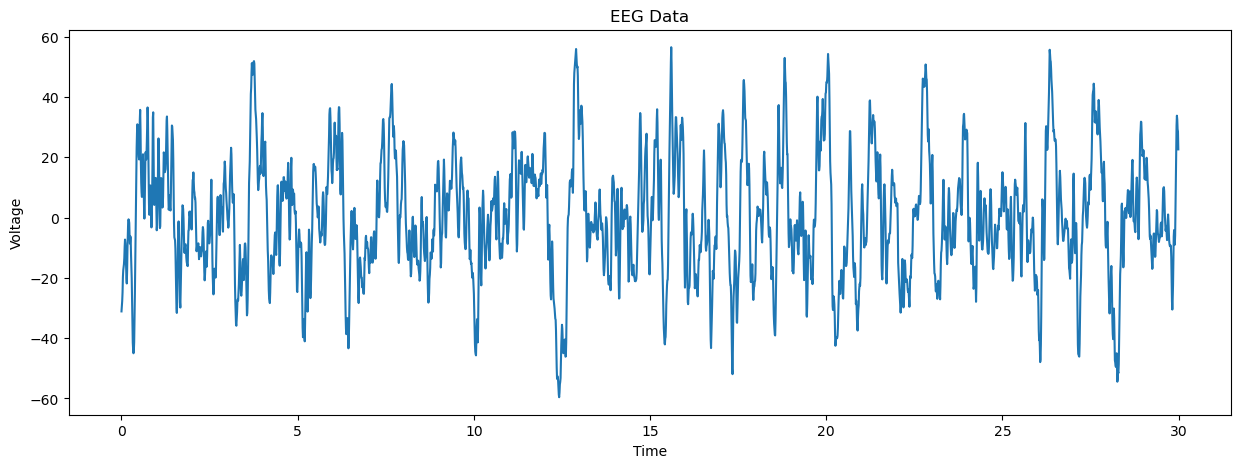

In [4]:
#We can plot the data to better visualize this so called Data
plt.figure(figsize=(15,5))
plt.plot(time,given_data)
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.title('EEG Data')


Text(0.5, 1.0, "Welch's periodogram")

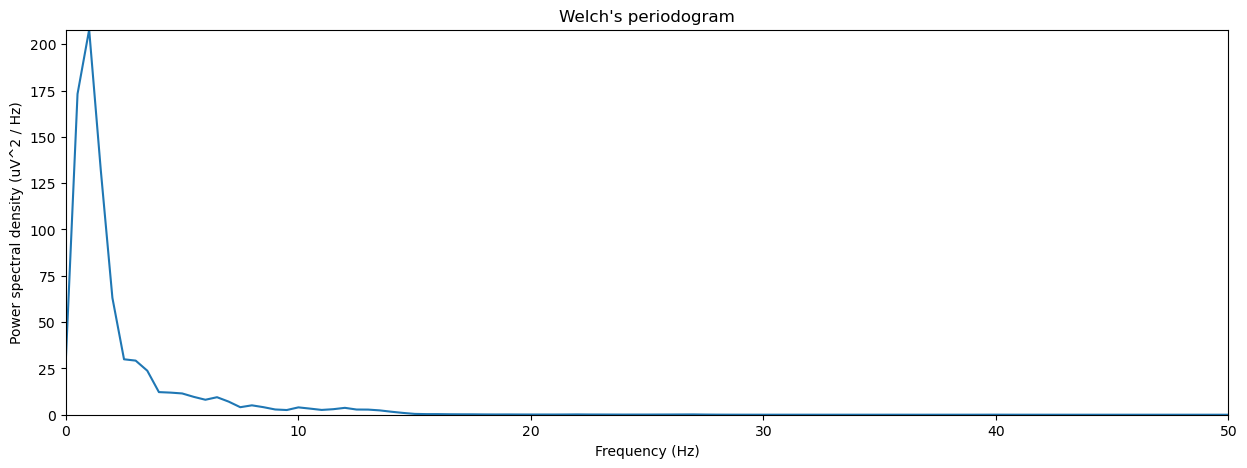

In [5]:
#In order to get PSD by Welch's method we need to understand the following things
#Frequency resolution: By using the full signal length (30 seconds) leads to a frequency resolution of 0.033 Hz (1/30 seconds). This means you can distinguish frequency components that are at least 0.033 Hz apart.
#Windowing and reduced resolution: Using a 5-second window reduces the frequency resolution to 0.2 Hz (1/5 seconds). This implies that you can only differentiate frequency components that are at least 0.20 Hz apart.
#Choosing the window duration: The common approach is to select a window that captures at least two full cycles of the lowest frequency of interest. In our case, with a 1 Hz lower limit, a 2-second window (2 cycles of 1 Hz) is appropriate.

from scipy import signal
window_width = 2 * sampling_frequency
freqs, psd = signal.welch(given_data, sampling_frequency, nperseg=window_width)

# Plot the power spectrum
plt.figure(figsize=(15, 5))
plt.plot(freqs, psd)
plt.xlabel('Frequency (Hz)')
plt.xlim([0, freqs.max()])
plt.ylim([0, psd.max()])
plt.ylabel('Power spectral density (uV^2 / Hz)')
plt.title("Welch's periodogram")


Text(0.5, 1.0, "Welch's periodogram")

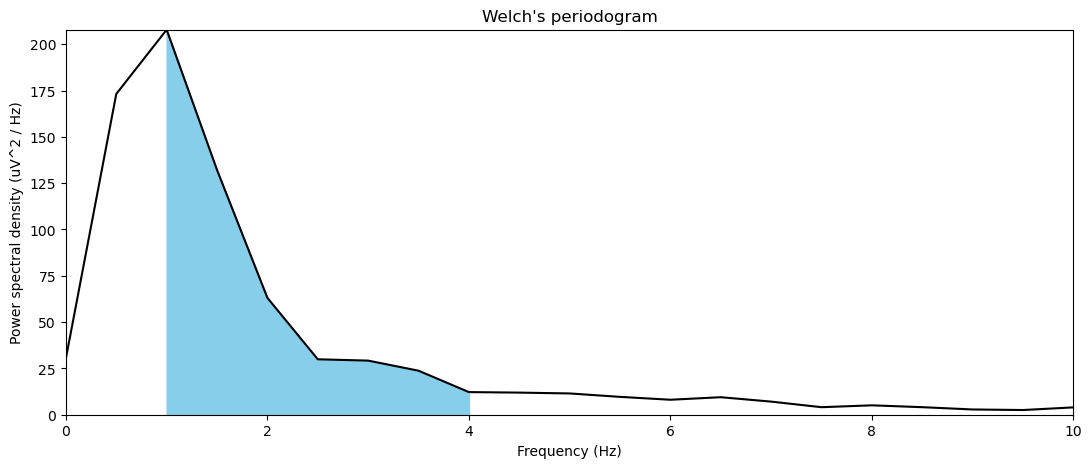

In [6]:
#Delta Band (1-4Hz)
# Define delta lower and upper limits
low, high = 1, 4

# Find intersecting values in frequency vector
req_area1 = np.logical_and(freqs >= low, freqs <= high)

# Plot the power spectral density and fill the delta area
plt.figure(figsize=(13, 5))
plt.plot(freqs, psd,color='k')
plt.fill_between(freqs, psd, where=req_area1, color='skyblue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (uV^2 / Hz)')
plt.xlim([0, 10])
plt.ylim([0, psd.max()])
plt.title("Welch's periodogram")

In [7]:
from scipy.integrate import simps

# Frequency resolution
freq_res = freqs[1] - freqs[0] 

# Compute the absolute power by approximating the area under the curve
delta_power = simps(psd[req_area1], dx=freq_res)
print('Absolute delta power: %.3f uV^2' % delta_power)

Absolute delta power: 191.303 uV^2


In [8]:
total_power = simps(psd, dx=freq_res)
delta_rel_power = delta_power / total_power
print('Relative delta power: %.3f' % delta_rel_power)

Relative delta power: 0.474


Text(0.5, 1.0, "Welch's periodogram")

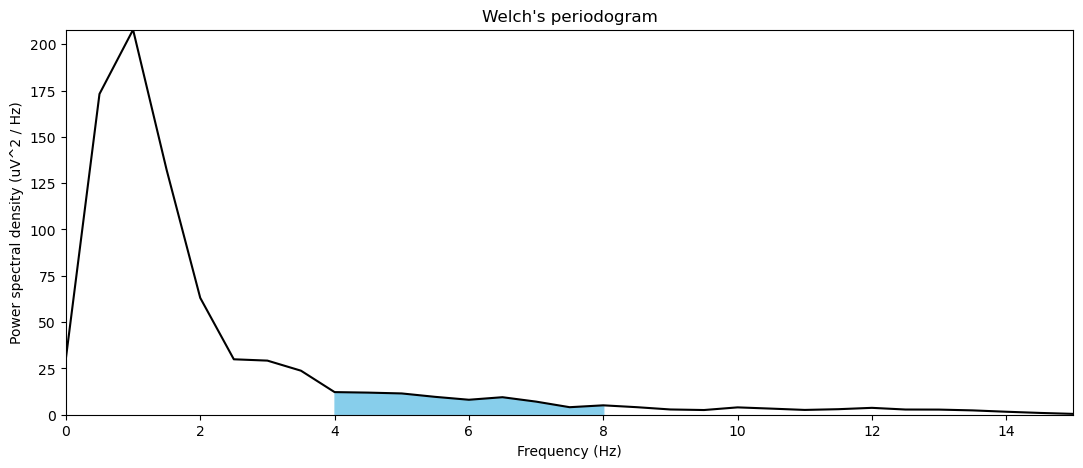

In [9]:
# Theta Band (4-8Hz)
# Define theta lower and upper limits
low, high = 4, 8

# Find intersecting values in frequency vector
req_area2 = np.logical_and(freqs >= low, freqs <= high)

# Plot the power spectral density and fill the delta area
plt.figure(figsize=(13, 5))
plt.plot(freqs, psd,color='k')
plt.fill_between(freqs, psd, where=req_area2, color='skyblue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (uV^2 / Hz)')
plt.xlim([0, 15])
plt.ylim([0, psd.max()])
plt.title("Welch's periodogram")

In [10]:
from scipy.integrate import simps

# Frequency resolution
freq_res = freqs[1] - freqs[0] 

# Compute the absolute power by approximating the area under the curve
theta_power = simps(psd[req_area2], dx=freq_res)
print('Absolute theta power: %.3f uV^2' % theta_power)

Absolute theta power: 35.152 uV^2


In [11]:
total_power = simps(psd, dx=freq_res)
theta_rel_power = theta_power / total_power
print('Relative delta power: %.3f' % theta_rel_power)

Relative delta power: 0.087


Text(0.5, 1.0, "Welch's periodogram")

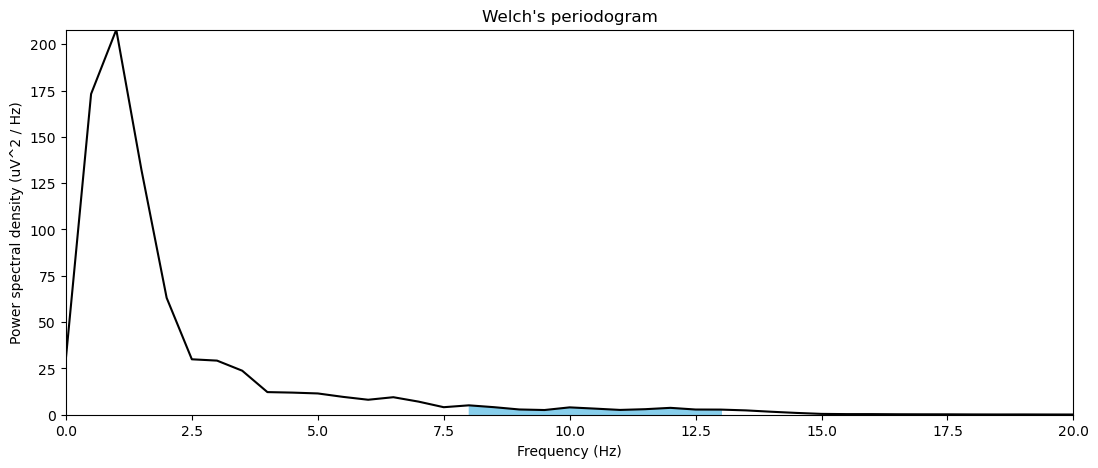

In [12]:
# Alpha Band (8-13Hz)
# Define alpha lower and upper limits
low, high = 8, 13

# Find intersecting values in frequency vector
req_area3 = np.logical_and(freqs >= low, freqs <= high)

# Plot the power spectral density and fill the delta area
plt.figure(figsize=(13, 5))
plt.plot(freqs, psd,color='k')
plt.fill_between(freqs, psd, where=req_area3, color='skyblue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (uV^2 / Hz)')
plt.xlim([0, 20])
plt.ylim([0, psd.max()])
plt.title("Welch's periodogram")

In [13]:
from scipy.integrate import simps

# Frequency resolution
freq_res = freqs[1] - freqs[0] 

# Compute the absolute power by approximating the area under the curve
alpha_power = simps(psd[req_area3], dx=freq_res)
print('Absolute alpha power: %.3f uV^2' % alpha_power)

Absolute alpha power: 16.134 uV^2


In [14]:
total_power = simps(psd, dx=freq_res)
alpha_rel_power = alpha_power / total_power
print('Relative delta power: %.3f' % alpha_rel_power)

Relative delta power: 0.040


Text(0.5, 1.0, "Welch's periodogram")

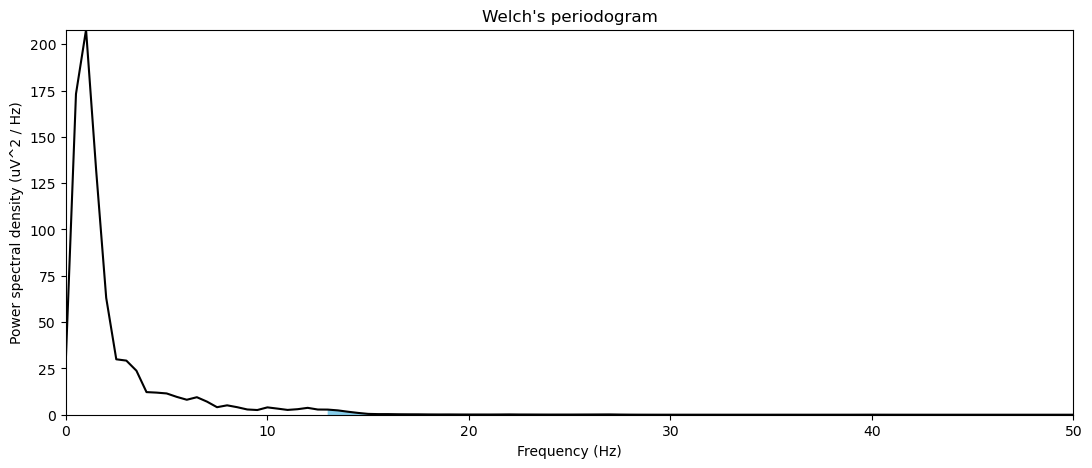

In [15]:
#Beta Band (13-30 Hz)
# Define beta lower and upper limits
low, high = 13, 30

# Find intersecting values in frequency vector
req_area4 = np.logical_and(freqs >= low, freqs <= high)

# Plot the power spectral density and fill the delta area
plt.figure(figsize=(13, 5))
plt.plot(freqs, psd,color='k')
plt.fill_between(freqs, psd, where=req_area4, color='skyblue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (uV^2 / Hz)')
plt.xlim([0, 50])
plt.ylim([0, psd.max()])
plt.title("Welch's periodogram")

In [16]:
from scipy.integrate import simps

# Frequency resolution
freq_res = freqs[1] - freqs[0] 

# Compute the absolute power by approximating the area under the curve
beta_power = simps(psd[req_area4], dx=freq_res)
print('Absolute beta power: %.3f uV^2' % beta_power)

Absolute beta power: 5.315 uV^2


In [17]:
total_power = simps(psd, dx=freq_res)
beta_rel_power = beta_power / total_power
print('Relative delta power: %.3f' % beta_rel_power)

Relative delta power: 0.013


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Text(0.5, 1.0, 'Multitaper Spectral Analysis')

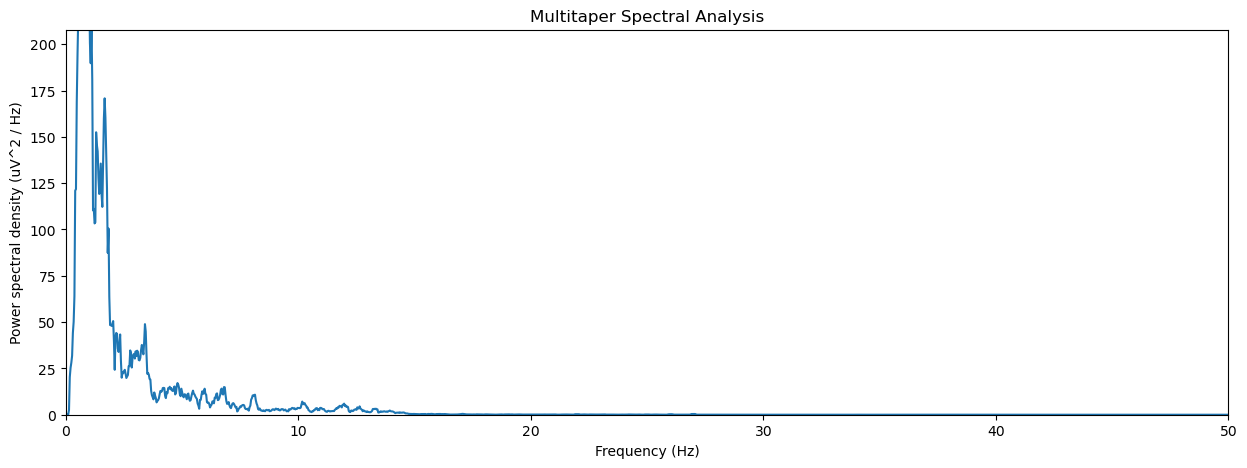

In [18]:
#Now lets do this using Multitaper
from mne.time_frequency import psd_array_multitaper
psdm, freqsm = psd_array_multitaper(given_data, sampling_frequency, adaptive=True, normalization='full', verbose=0)
# Plot the power spectrum
plt.figure(figsize=(15, 5))
plt.plot(freqsm, psdm)
plt.xlabel('Frequency (Hz)')
plt.xlim([0, freqs.max()])
plt.ylim([0, psd.max()])
plt.ylabel('Power spectral density (uV^2 / Hz)')
plt.title("Multitaper Spectral Analysis")

Text(0.5, 1.0, 'Multitaper Spectral Analysis')

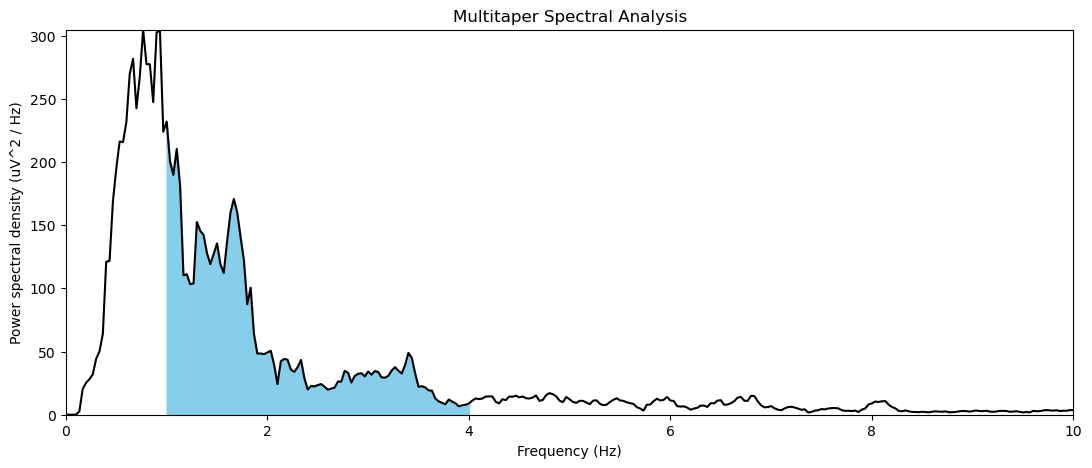

In [19]:
#Delta Band (1-4Hz)
# Define delta lower and upper limits
low, high = 1, 4

# Find intersecting values in frequency vector
req_area1 = np.logical_and(freqsm >= low, freqsm <= high)

# Plot the power spectral density and fill the delta area
plt.figure(figsize=(13, 5))
plt.plot(freqsm, psdm,color='k')
plt.fill_between(freqsm, psdm, where=req_area1, color='skyblue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (uV^2 / Hz)')
plt.xlim([0, 10])
plt.ylim([0, psdm.max()])
plt.title("Multitaper Spectral Analysis")

In [20]:
from scipy.integrate import simps

# Frequency resolution
freq_res = freqsm[1] - freqsm[0] 

# Compute the absolute power by approximating the area under the curve
delta_power = simps(psdm[req_area1], dx=freq_res)
print('Absolute delta power: %.3f uV^2' % delta_power)

Absolute delta power: 182.458 uV^2


In [21]:
total_power = simps(psdm, dx=freq_res)
delta_rel_power = delta_power / total_power
print('Relative delta power: %.3f' % delta_rel_power)

Relative delta power: 0.462


Text(0.5, 1.0, 'Multitaper Spectral Analysis')

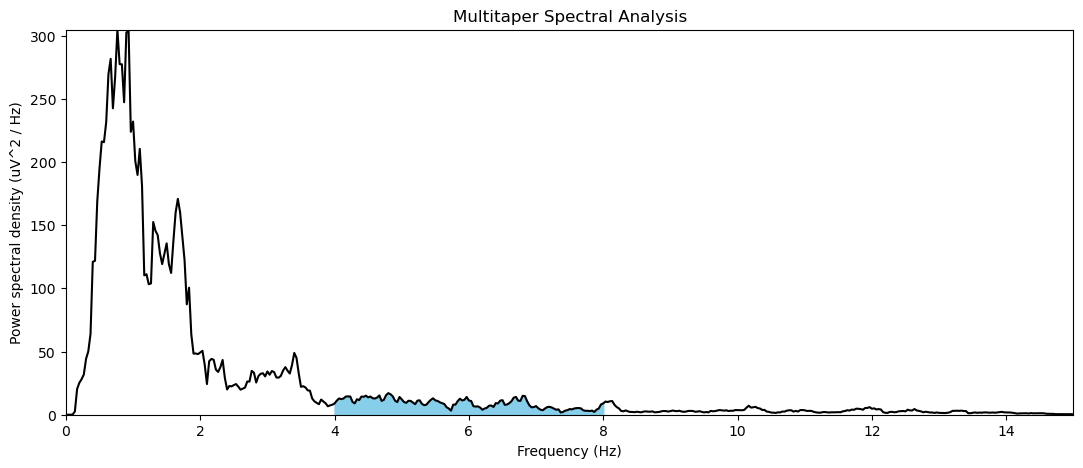

In [22]:
# Theta Band (4-8Hz)
# Define theta lower and upper limits
low, high = 4, 8

# Find intersecting values in frequency vector
req_area2 = np.logical_and(freqsm >= low, freqsm <= high)

# Plot the power spectral density and fill the delta area
plt.figure(figsize=(13, 5))
plt.plot(freqsm, psdm,color='k')
plt.fill_between(freqsm, psdm, where=req_area2, color='skyblue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (uV^2 / Hz)')
plt.xlim([0, 15])
plt.ylim([0, psdm.max()])
plt.title("Multitaper Spectral Analysis")

In [23]:
from scipy.integrate import simps

# Frequency resolution
freq_res = freqsm[1] - freqsm[0] 

# Compute the absolute power by approximating the area under the curve
theta_power = simps(psdm[req_area2], dx=freq_res)
print('Absolute theta power: %.3f uV^2' % theta_power)

Absolute theta power: 36.188 uV^2


In [24]:
total_power = simps(psdm, dx=freq_res)
theta_rel_power = theta_power / total_power
print('Relative delta power: %.3f' % theta_rel_power)

Relative delta power: 0.092


Text(0.5, 1.0, 'Multitaper Spectral Analysis')

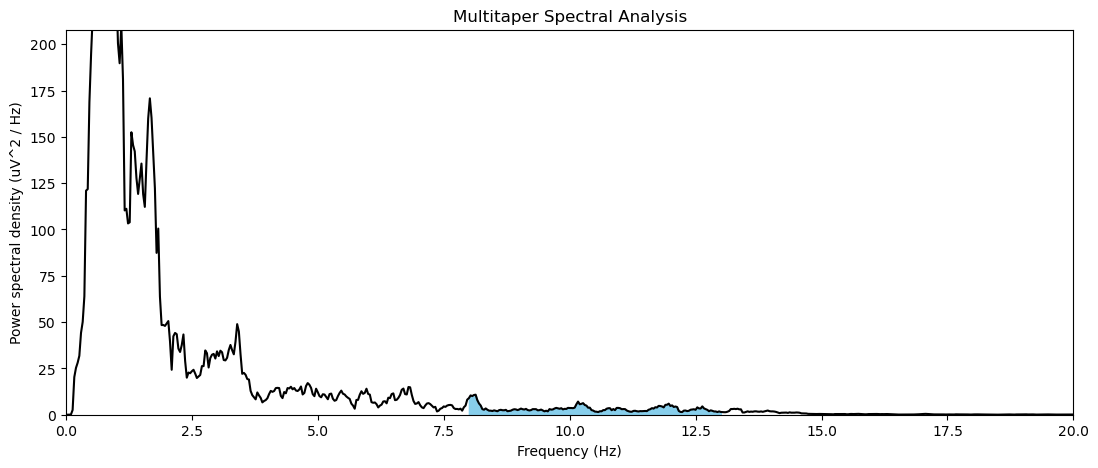

In [25]:
# Alpha Band (8-13Hz)
# Define alpha lower and upper limits
low, high = 8, 13

# Find intersecting values in frequency vector
req_area3 = np.logical_and(freqsm >= low, freqsm <= high)

# Plot the power spectral density and fill the delta area
plt.figure(figsize=(13, 5))
plt.plot(freqsm, psdm,color='k')
plt.fill_between(freqsm, psdm, where=req_area3, color='skyblue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (uV^2 / Hz)')
plt.xlim([0, 20])
plt.ylim([0, psd.max()])
plt.title("Multitaper Spectral Analysis")

In [26]:
from scipy.integrate import simps

# Frequency resolution
freq_res = freqsm[1] - freqsm[0] 

# Compute the absolute power by approximating the area under the curve
alpha_power = simps(psdm[req_area3], dx=freq_res)
print('Absolute alpha power: %.3f uV^2' % alpha_power)

Absolute alpha power: 16.323 uV^2


In [27]:
total_power = simps(psdm, dx=freq_res)
alpha_rel_power = alpha_power / total_power
print('Relative delta power: %.3f' % alpha_rel_power)

Relative delta power: 0.041


Text(0.5, 1.0, 'Multitaper Spectral Analysis')

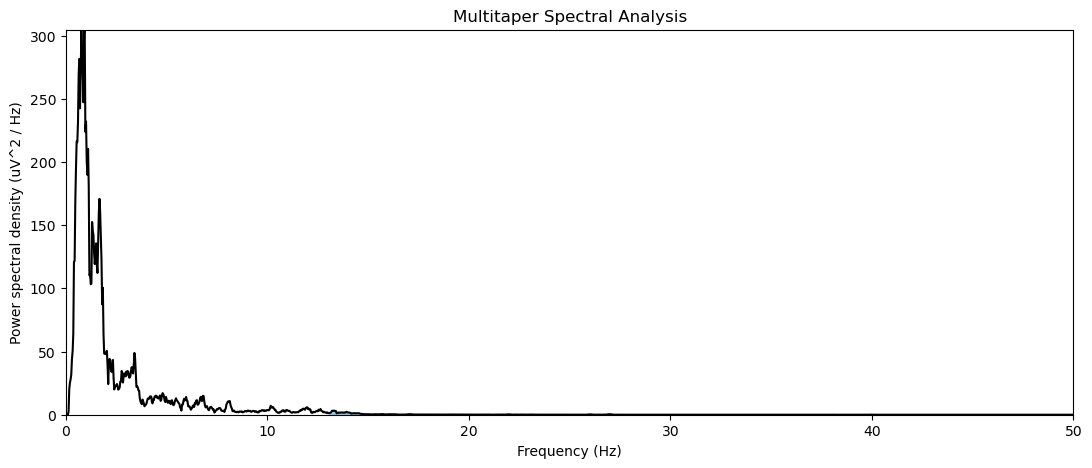

In [28]:
#Beta Band (13-30 Hz)
# Define beta lower and upper limits
low, high = 13, 30

# Find intersecting values in frequency vector
req_area4 = np.logical_and(freqsm >= low, freqsm <= high)

# Plot the power spectral density and fill the delta area
plt.figure(figsize=(13, 5))
plt.plot(freqsm, psdm,color='k')
plt.fill_between(freqsm, psdm, where=req_area4, color='skyblue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (uV^2 / Hz)')
plt.xlim([0, 50])
plt.ylim([0, psdm.max()])
plt.title("Multitaper Spectral Analysis")

In [29]:
from scipy.integrate import simps

# Frequency resolution
freq_res = freqsm[1] - freqsm[0] 

# Compute the absolute power by approximating the area under the curve
beta_power = simps(psdm[req_area4], dx=freq_res)
print('Absolute beta power: %.3f uV^2' % beta_power)

Absolute beta power: 4.792 uV^2


In [30]:
total_power = simps(psdm, dx=freq_res)
beta_rel_power = beta_power / total_power
print('Relative delta power: %.3f' % beta_rel_power)

Relative delta power: 0.012


In [31]:
#From both methods we are getting approx same values.